In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [21]:
data = pd.read_csv("payroll_fraud_dataset.csv")

In [22]:
try:
    data['overtime_ratio'] = data['Overtime Hours'] / data['Working Hours']
except Exception as e:
    data['overtime_ratio'] = 1e5

data['Total Compensation'] = data['Salary'] + data['Bonuses']

In [23]:
data['Is_Active'] = data['Employment Status'].apply(lambda x: 1 if x=='Employee' else 0)
data['Bank Account Number'] = data['Bank Account Number'].str.extract('(\d+)', expand=False).astype(int)

In [24]:
features = data.drop(columns=["Employee ID", "Employee Name", "Employment Status","Suspicious Activity Flag"])

In [25]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(features)

In [26]:
iso = IsolationForest(n_estimators=100, contamination=0.15, random_state=42)

data['anamoly_score'] = iso.fit_predict(scaled_data)

data['flag'] = data['anamoly_score'].apply(lambda x: 1 if x==-1 else 0) 

In [27]:
confusion = pd.crosstab(data['Suspicious Activity Flag'], data['flag'],
                        rownames=['Supervised (Ground Truth)'],
                        colnames=['Unsupervised (Predicted)'])

In [28]:
print(confusion)

Unsupervised (Predicted)      0    1
Supervised (Ground Truth)           
0                          7595  564
1                           905  936


In [29]:
data['Suspicious Activity Flag'].value_counts()


Suspicious Activity Flag
0    8159
1    1841
Name: count, dtype: int64

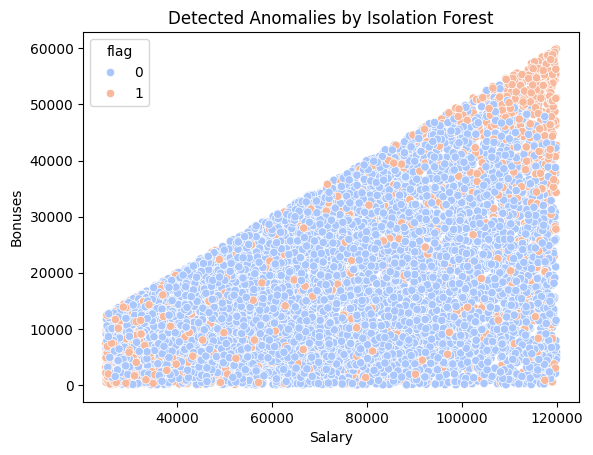

In [32]:
# Plot salary vs bonus colored by unsupervised prediction
sns.scatterplot(data=data, x='Salary', y='Bonuses', hue='flag', palette='coolwarm')
plt.title("Detected Anomalies by Isolation Forest")
plt.show()

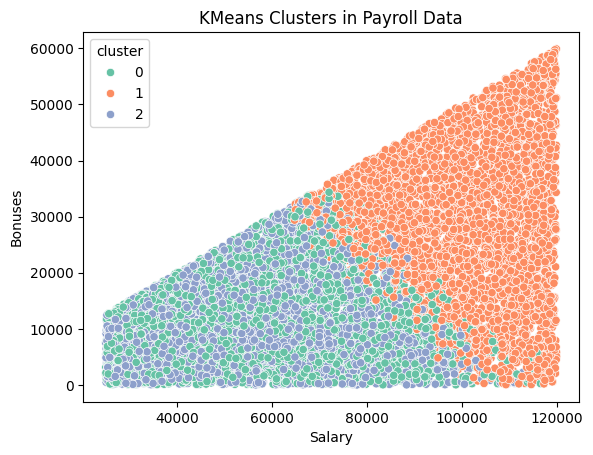

In [34]:

from sklearn.cluster import KMeans
import numpy as np
 
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_data)
 
sns.scatterplot(data=data, x='Salary', y='Bonuses', hue='cluster', palette='Set2')
plt.title("KMeans Clusters in Payroll Data")
plt.show()
 